In [ ]:

%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 785.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Note: you may need to restart the kernel to use updated packages.
Required packages installed successfully!

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None

=== First 5 Rows ===
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-

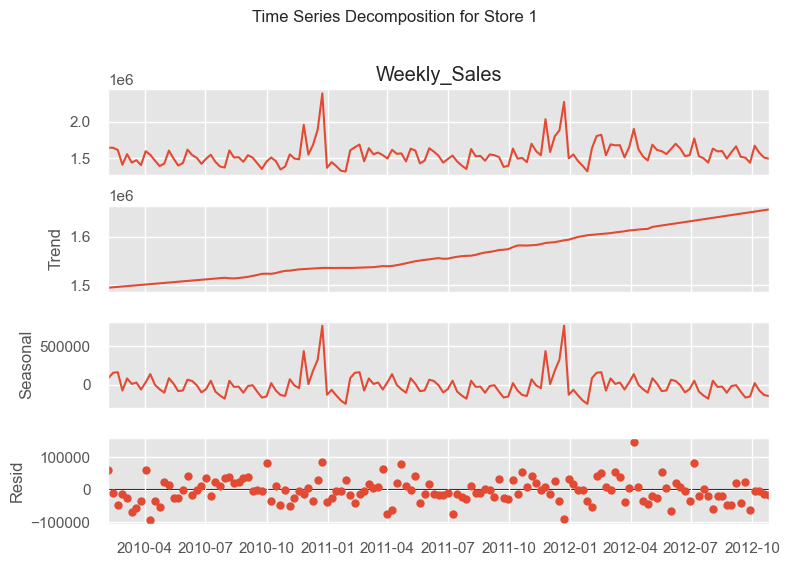

In [14]:
# FIRST RUN THIS CELL ALONE to ensure packages are installed properly
# Use --quiet to minimize output
%pip install --quiet statsmodels seaborn matplotlib pandas numpy
print("Required packages installed successfully!")

# THEN RUN THIS CELL for the actual analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Configure styles properly - updated for modern matplotlib
sns.set_theme(style="whitegrid")  # This is the recommended way
plt.style.use('ggplot')  # Alternative style that always works

# Load data with robust date parsing
try:
    # Try multiple date formats to ensure parsing works
    df = pd.read_csv('../data/raw/train.csv', parse_dates=['Date'], dayfirst=True)
    
    # Validate date parsing
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        print("Automatic date parsing failed, trying manual conversion...")
        df['Date'] = pd.to_datetime(df['Date'], 
                                  dayfirst=True, 
                                  format='mixed', 
                                  errors='coerce')
        
    # Check if any dates failed to parse
    if df['Date'].isnull().any():
        print(f"Warning: {df['Date'].isnull().sum()} dates failed to parse")
        print("Sample problematic dates:", df[df['Date'].isnull()]['Date'].head())
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Basic exploration
print("\n=== Dataset Info ===")
print(df.info())

print("\n=== First 5 Rows ===")
print(df.head())

print("\n=== Descriptive Statistics ===")
print(df.describe(include='all'))

print("\n=== Missing Values ===")
print(df.isnull().sum())

# Time series decomposition with enhanced error handling
try:
    print("\n=== Preparing time series data ===")
    store1 = df[df['Store'] == 1].copy()
    
    # Ensure we have a proper datetime index
    store1.set_index('Date', inplace=True)
    store1.sort_index(inplace=True)  # Important for time series
    
    # Resample to weekly frequency if needed
    if not pd.infer_freq(store1.index):
        print("Data isn't regularly spaced, resampling to weekly...")
        store1 = store1.resample('W').mean()  # Or .sum() depending on your analysis
    
    # Handle missing values
    if store1['Weekly_Sales'].isnull().any():
        print(f"Filling {store1['Weekly_Sales'].isnull().sum()} missing values")
        store1['Weekly_Sales'] = store1['Weekly_Sales'].fillna(method='ffill')
    
    print("\n=== Time Series Decomposition ===")
    result = seasonal_decompose(store1['Weekly_Sales'], 
                              model='additive', 
                              period=52,
                              extrapolate_trend='freq')  # Helps with edge effects
    result.plot()
    plt.suptitle('Time Series Decomposition for Store 1', y=1.02)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"\nError in time series analysis: {e}")
    print("Common issues:")
    print("- Not enough data points (need at least 2 full periods)")
    print("- Irregular time series frequency")
    print("- Missing values in the data")
    print("Sample data head:\n", store1.head() if 'store1' in locals() else "Data not loaded")

# Correlation analysis with more robust numeric

Note: you may need to restart the kernel to use updated packages.
=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None

=== Descriptive Statistics ===
             Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06    

/var/folders/rq/z8clsbl52qs8dztth0yk792m0000gn/T/ipykernel_7225/2899678725.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  store1['Weekly_Sales'] = store1['Weekly_Sales'].fillna(method='ffill')


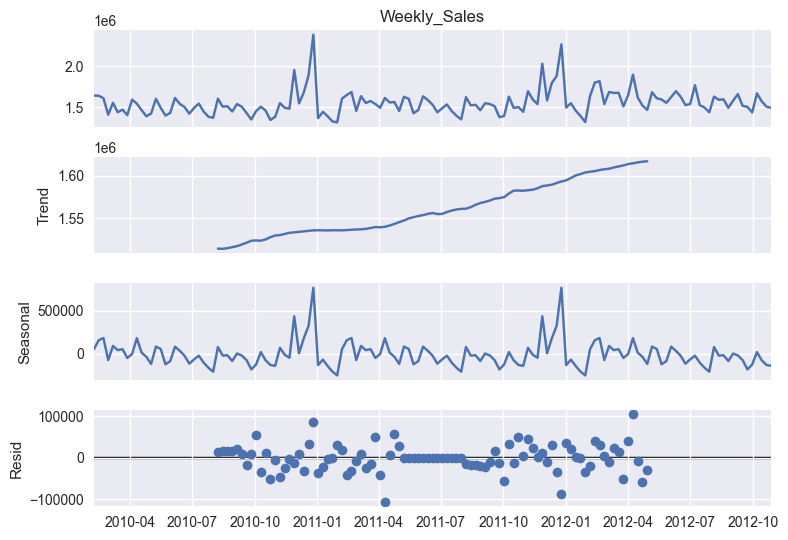


=== Correlation Analysis ===


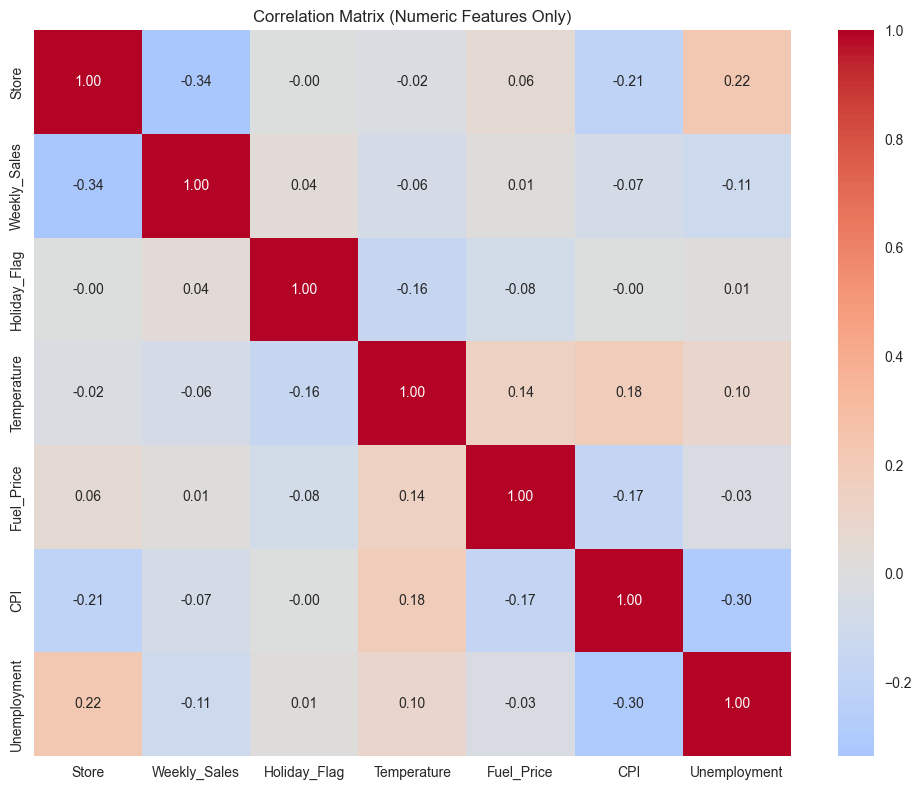

In [1]:
# First install required packages (run this cell first)
%pip install statsmodels seaborn xgboost

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set seaborn style properly
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')  # Modern way to use seaborn style in matplotlib

# Load data with proper date parsing
try:
    df = pd.read_csv('../data/raw/train.csv', parse_dates=['Date'], dayfirst=True)
    # Ensure date parsing worked
    if not pd.api.types.is_datetime64_any_dtype(df['Date']):
        df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Basic exploration
print("=== Dataset Info ===")
print(df.info())

print("\n=== Descriptive Statistics ===")
print(df.describe(include='all'))  # Include non-numeric columns

print("\n=== Missing Values ===")
print(df.isnull().sum())

# Time series decomposition for a single store
try:
    store1 = df[df['Store'] == 1].set_index('Date')
    # Resample to weekly if needed (ensure consistent frequency)
    store1 = store1.resample('W').mean()  # Or .sum() depending on your needs
    
    # Handle NaN values that might appear from resampling
    store1['Weekly_Sales'] = store1['Weekly_Sales'].fillna(method='ffill')
    
    result = seasonal_decompose(store1['Weekly_Sales'], model='additive', period=52)
    result.plot()
    plt.show()
except Exception as e:
    print(f"Error in time series decomposition: {e}")

# Correlation analysis - robust version
print("\n=== Correlation Analysis ===")
numeric_df = df.select_dtypes(include=[np.number])

if not numeric_df.empty:
    corr = numeric_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', center=0)
    plt.title('Correlation Matrix (Numeric Features Only)')
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found for correlation analysis.")